In [1]:
#from dotenv import load_dotenv
#import sqlite3
#import uuid
#import pandas as pd
#import nltk
#from nltk.tokenize import sent_tokenize

#nltk.download('punkt')

#from utils.RedditDataCollector import RedditDataCollector

#load_dotenv()
#collector = RedditDataCollector()

#collector.collect_hot_text_data(
#	limit=800, 
#	after='1577836800', # 2020-01-01
#	before='1735689600', # 2025-01-01
#)

##collector.collect_text_data(
##	limit=5,
##)

##now_txt = pd.Timestamp.now().strftime('%Y%m%d%H%M%S')

## Assuming collector.post_data and collector.comment_data are available
#post_df = pd.DataFrame(collector.post_data)
#comment_df = pd.DataFrame(collector.comment_data, columns=['id', 'post_id', 'created', 'text'])
#comment_df['id'] = comment_df['id'].astype(str)
#comment_df['post_id'] = comment_df['post_id'].astype(str)
#comment_df['created'] = pd.to_datetime(comment_df['created'])
#comment_df['text'] = comment_df['text'].astype(str)

## Initialize lists to store sentences and comment-sentence relationships
#sentences = []
#comment_sentence_ids = []

#from transformers import pipeline
#classifier = pipeline(
#	"text-classification", 
#	model="j-hartmann/emotion-english-distilroberta-base", 
#	return_all_scores=False
#)

## Iterate through each comment
#for c_i, row in comment_df.iterrows():
#	# Store the sentence IDs for each comment
#	tokenized_sentences = nltk.sent_tokenize(row['text'])
#	for s_i, sentence in enumerate(tokenized_sentences):
#		if sentence in [s['text'] for s in sentences]:
#			continue
#		sentence_id = uuid.uuid4()
#		emotion = {}
#		try:
#			emotion = classifier(sentence)[0]
#		except:
#			emotion = {'label': 'neutral', 'score': -1}
#		sentences.append({
#			'id': sentence_id,
#			'emotion_label': emotion['label'],
#			'emotion_score': emotion['score'],
#			'text': sentence,
#		})

#		comment_sentence_ids.append({'comment_id': row['id'], 'sentence_id': sentence_id, 'order': s_i})
#	print("\n")

## Convert lists to DataFrames
#sentence_df = pd.DataFrame(sentences, columns=['id', 'emotion_label', 'emotion_score', 'text'])
#sentence_df['id'] = sentence_df['id'].astype(str)
#sentence_df['emotion_label'] = sentence_df['emotion_label'].astype(str)
#sentence_df['emotion_score'] = sentence_df['emotion_score'].astype(float)
#sentence_df['text'] = sentence_df['text'].astype(str)

#comment_sentence_df = pd.DataFrame(comment_sentence_ids, columns=['comment_id', 'sentence_id', 'order'])
#comment_sentence_df['comment_id'] = comment_sentence_df['comment_id'].astype(str)
#comment_sentence_df['sentence_id'] = comment_sentence_df['sentence_id'].astype(str)
#comment_sentence_df['order'] = comment_sentence_df['order'].astype(int)

#post_df.to_csv('./data/posts.csv', index=False)
#comment_df.to_csv('./data/comments.csv', index=False)
#sentence_df.to_csv('./data/sentences.csv', index=False)
#comment_sentence_df.to_csv('./data/comment_sentences.csv', index=False)

#!rm -rf ./data/hot_data.db
#conn = sqlite3.connect('./data/hot_data.db')
#post_df.to_sql('posts', conn, if_exists='replace', index=False)
#comment_df.to_sql('comments', conn, if_exists='replace', index=False)
#sentence_df.to_sql('sentences', conn, if_exists='replace', index=False)
#comment_sentence_df.to_sql('comment_sentences', conn, if_exists='replace', index=False)

#conn.close()



[nltk_data] Downloading package punkt to /Users/masaishi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 800/800 [16:44<00:00,  1.26s/it]
/Users/masaishi/miniforge3/envs/tf/lib/python3.9/site-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Token indices sequence length is longer than the specified maximum sequence length for this model (538 > 512). Running this sequence through the model will result in indexing errors


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [10]:
sentence_df['text'].duplicated().sum()

0

In [11]:
sentence_df

,id,emotion_label,emotion_score,text
0,02800384-e825-4c27-a99b-c06ab73ea1cb,joy,0.770712,Hey Slugs!
1,96d7bb5b-7708-4f58-b694-9492747c8df8,fear,0.786226,Be aware of common craigslist housing scams!
2,dc92592d-631a-4a37-90ce-8bea1ad2f154,neutral,0.577710,"Of course not all post are scams, but you shou..."
3,bf96087e-5361-4bf5-a3d3-8c0feebd45fd,neutral,0.802858,1.
4,56967f14-196b-4af2-a259-8e5f04e89bcf,neutral,0.643948,The Listing Has No Photos\n2.
...,...,...,...,...
2020,42bfcbc4-814e-4f54-b3c4-255d1bfadffe,fear,0.434117,I am looking for housing starting this summer.
2021,6290679c-973c-4c6c-b626-4111142af600,neutral,0.516996,My instagram is @ nomas.kaelando and I can pay...
2022,38a2079b-5f1f-4af2-b878-6eaf3a072159,neutral,0.524164,I am 420 friendly and I have a ps5 and nintend...
2023,717230b6-ea47-4e14-8f14-73b933245b6b,fear,0.784090,Psychology major entering my senior year by th...


In [12]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('./data/hot_data.db')

# Plit comments
test_df = pd.read_sql('SELECT * FROM comment_sentences', conn)
test_df = pd.read_sql('SELECT * FROM sentences', conn)
test_df

,id,emotion_label,emotion_score,text
0,02800384-e825-4c27-a99b-c06ab73ea1cb,joy,0.770712,Hey Slugs!
1,96d7bb5b-7708-4f58-b694-9492747c8df8,fear,0.786226,Be aware of common craigslist housing scams!
2,dc92592d-631a-4a37-90ce-8bea1ad2f154,neutral,0.577710,"Of course not all post are scams, but you shou..."
3,bf96087e-5361-4bf5-a3d3-8c0feebd45fd,neutral,0.802858,1.
4,56967f14-196b-4af2-a259-8e5f04e89bcf,neutral,0.643948,The Listing Has No Photos\n2.
...,...,...,...,...
2020,42bfcbc4-814e-4f54-b3c4-255d1bfadffe,fear,0.434117,I am looking for housing starting this summer.
2021,6290679c-973c-4c6c-b626-4111142af600,neutral,0.516996,My instagram is @ nomas.kaelando and I can pay...
2022,38a2079b-5f1f-4af2-b878-6eaf3a072159,neutral,0.524164,I am 420 friendly and I have a ps5 and nintend...
2023,717230b6-ea47-4e14-8f14-73b933245b6b,fear,0.784090,Psychology major entering my senior year by th...


In [13]:
import sqlite3

conn = sqlite3.connect('./data/hot_data.db')
cursor = conn.cursor()

query_comment_ids = 'SELECT id FROM comments ORDER BY RANDOM() LIMIT 5'
cursor.execute(query_comment_ids)

comment_ids = cursor.fetchall()

comments_response = []
for comment_id in comment_ids:
	comment_response = {}

	# Get comment data
	query_comment = f"SELECT * FROM comments WHERE id = '{comment_id[0]}'"
	cursor.execute(query_comment)
	comment = cursor.fetchone()
	comment_response['comment_id'] = comment[0]
	comment_response['post_id'] = comment[1]
	comment_response['created'] = comment[2]


	query_sentence_ids = f"SELECT sentence_id FROM comment_sentences WHERE comment_id = '{comment_id[0]}' ORDER BY \"order\""
	cursor.execute(query_sentence_ids)
	sentence_ids_str = ','.join(f"'{s[0]}'" for s in cursor.fetchall())
	
	# Get sentence data
	query_sentences = f"SELECT * FROM sentences WHERE id IN ({sentence_ids_str}) ORDER BY \"order\""
	cursor.execute(query_sentences)
	sentences = cursor.fetchall()
	comment_response['sentences'] = sentences

	comments_response.append(comment_response)

cursor.close()
conn.close()

In [14]:
import json

print(json.dumps(comments_response, indent=4))

[
    {
        "comment_id": "h5gns4i",
        "post_id": "o7c6mz",
        "created": "2021-07-16 17:26:12",
        "sentences": [
            [
                "8feeeebc-bd3f-4e2f-ab84-880a77cafe28",
                "neutral",
                0.8225309252738953,
                "Your only choice is to become gay"
            ]
        ]
    },
    {
        "comment_id": "jb6msfr",
        "post_id": "o7c6mz",
        "created": "2023-03-06 12:50:34",
        "sentences": [
            [
                "d17be3e3-4426-410f-9d95-e59c41ac0b42",
                "neutral",
                0.6641404628753662,
                "[Looking for Long-term Lease] Hi I am a CS PhD student at UCSC (22M) and I am looking for anything between a studio (me + my partner) to a 3-bedroom (me, my partner, and my friends)."
            ],
            [
                "7b537b5c-70f3-4585-a5ff-eab503944d0e",
                "neutral",
                0.9371762871742249,
                "I would prefer st

In [15]:
%%time

conn = sqlite3.connect('./data/hot_data.db')
cursor = conn.cursor()

search_query = f"SELECT * FROM sentences WHERE LOWER(text) LIKE \"%I'm%\" ORDER BY RANDOM() LIMIT 5"
cursor.execute(search_query)
results = cursor.fetchall()
print(results)

[('446dbc29-492c-4cf0-bd1c-2abe64a9c1b7', 'joy', 0.5084878206253052, "I'm an art major and my roommate is an electrical engineering major."), ('8ee65db1-539d-4a71-808f-0e378f910146', 'sadness', 0.7210206985473633, "I'm a Plant Science major that transferred to UCSC in the Fall of 2022."), ('2a6bc116-bc48-4d02-b04e-0a64955b51b7', 'neutral', 0.4352532625198364, "Hey I'm a computer science senior looking for some off-campus housing."), ('6b02f2b3-3f4c-41c2-ab4d-47219accdd98', 'joy', 0.9133847951889038, "I'm currently a CS major and am trying to graduate in 3 years."), ('c524fb2f-2e66-4998-b549-133cfb452fea', 'joy', 0.6630949378013611, "I had pretty good relationships with my last housemates so I'm sure we'll be able to get along :)\n\nedit: m21")]
CPU times: user 2.48 ms, sys: 2.21 ms, total: 4.7 ms
Wall time: 3.98 ms


In [63]:
%%time

examples_num = 5

#example_texts = hot_df[hot_df["text"].str.contains(word_info["word"], na=False)]["text"].tolist()[:examples_num]
example_texts = sentence_df[sentence_df["text"].str.contains("I'm", na=False)]["text"].tolist()[:examples_num]


CPU times: user 3.94 ms, sys: 11.7 ms, total: 15.6 ms
Wall time: 30 ms


In [ ]:
from transformers import pipeline

classifier = pipeline(
	"text-classification", 
	model="j-hartmann/emotion-english-distilroberta-base", 
	return_all_scores=False
)

/Users/masaishi/miniforge3/envs/tf/lib/python3.9/site-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [5]:
from tqdm import tqdm

results = []
for i, text in tqdm(enumerate(all_text), total=len(all_text)):
	try:
		result = classifier(text)[0]
		result['text'] = text
		result['words'] = text.split(' ')
		results.append(result)
	except:
		print(f'Too long text on {i}, {text}')

results_df = pd.DataFrame(results)
results_df.to_csv(f'data/hot_results_{now_txt}.csv', index=False)

  5%|▍         | 978/20895 [00:28<08:33, 38.81it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (1166 > 512). Running this sequence through the model will result in indexing errors


Too long text on 979, # COLA Subreddits (unmoderated):

* r/UCSCCola \- COLA
* r/UCSCStAC \- Students Against COLA
* r/UCSCuncensored \- Another COLA subreddit (not r/UCSC affiliated)

**These subreddits will** **not** **be moderated except for basic** [reddit rules](https://www.reddithelp.com/en/categories/reddit-101/reddit-basics/reddiquette)**.**

I created these communities because r/Cola was shut down by the moderator. Their message about why they shut it down can be [found here](https://www.reddit.com/r/ucsccola/comments/fdp43f/ucsc_cola/).

*We're getting hundreds of reports a day and a lot of fights are breaking out so we are consolidating COLA and protest content here to help us keep up with the community.*

*Thank you for your understand and patience!*

&#x200B;

&#x200B;

&#x200B;

# Updates (old)

**Please message us if you would like content added to this thread. Both pro-COLA and Students Against COLA content is accepted.**

Next week (3/8 - 3/14)

* : ?

This week (2-28 

  5%|▍         | 1037/20895 [00:30<10:18, 32.13it/s]

Too long text on 1033, Was doing my laundry and I had to reload my balance using this god awful app instead of the real credit card readers we used to have. In any case, I go to check out and the transaction fails. I thought it was a glitch but then I tried apple pay and even manually adding the card details each time it would fail and not add anything to the balance. I didn't think anything of it but then a few days later the charges showed up on my credit card even though I received ZERO laundry credits. And trying to get this situation resolved is a nightmare. The live chat feature doesn't even work and claims that no agents are available no matter what time of day you do the chat and the phone support hold times are an hour or more and I waited that long for nobody to pick up and I just gave up and called Capital One to dispute the transaction and hopefully that works out for me or else I'm screwed.

Lesson of the story: If your laundry room still has the physical card readers be g

  5%|▌         | 1093/20895 [00:32<09:05, 36.27it/s]

Too long text on 1089, This will be an obvious response to a previous post on those who regret attending this school. I really feel for these people because that is how I felt halfway thru my first quarter last year as a transfer student.

I'm a non-traditional student (25+ yr old), who hasn't experienced a full life, but has experienced enough to know that the grass is always greener on the other side. That's the human mind that has been conditioned to constantly project itself into a future scenario that will surely bring fulfillment. It's *that school*, or *that relationship*, or *that job*, that will bring lasting satisfaction. Spoiler alert, it's not. Don't become like the majority of our society that thinks it's the next big thing that will make you happy. I sure was guilty of this when I set many expectations for what ucsc would be like.

Truth is, you can go to any school Reddit page and find dozens of students who lament on how awful their school is and how they regret going t

  6%|▋         | 1308/20895 [00:39<09:36, 34.00it/s]

Too long text on 1304, I’m graduating this spring with a BS in physics (astrophysics) and I feel like I have learned absolutely nothing in my upper division classes. When I look back on classes I’ve taken, everything just feels like a fever dream. My notes are just a bunch of equations with zero context. Every time I try to learn a new concept, there’s always a couple very niche calculus proofs you need to do or some other background information which a whole other class could be dedicated to, but it’s all just glossed over. 


I’ve also been doing research during this time and have used nothing that I have learned in class for my research. I honestly have no idea wtf any of my classes are for. I’m glad we went over how to solve the time independent Schrödinger equation for a free particle, but what the actual hell do I need this for and in what context is this happening in besides very specific circumstances in a lab? Nothing I have learned seems practical, and if it is practical then

  7%|▋         | 1372/20895 [00:41<08:54, 36.55it/s]

Too long text on 1367, I just took Stat80A: Gambling and Gaming this quarter and got an A. With an interest in game design, I really enjoyed the content and had a lot of fun learning about it. 

TLDR: group assignments were tough as peers may not have coding experience/proficiency and you are essentially required to learn a (possibly) new coding language in 10 weeks on top of the lectures in class :)

If you are like me: gathering prerequisites to declare a CS:GD major, you might think to yourself: "Maybe this would be a fun educational experience for me (despite not needing the class for any GE or as a prerequisite)."

And it was! But for the wrong reasons.

First of all, the description on the UCSC website for STAT 80A is not accurate. ([https://ucsc.smartcatalogiq.com/en/current/general-catalog/courses/stat-statistics/](https://ucsc.smartcatalogiq.com/en/current/general-catalog/courses/stat-statistics/))

It does not highlight the **weekly labs** that you are going to be doing learn

  7%|▋         | 1380/20895 [00:41<08:55, 36.44it/s]

Too long text on 1375, From the SCMTD newsletter (route changes and retiring the ticket-vending machines):

>**Reimagine METRO service changes start December 21!**  
>  
>Experience more service, higher frequency, simpler routes, and better transfers with Reimagine METRO Phase 1. This wave of change starts Dec. 21 and includes 15-minute all-day service on Routes 18 and 19, serving UCSC and Downtown Santa Cruz. Other important changes include the return of express service between Watsonville and Santa Cruz during busy peak commute times, as well as an all-new Route 3 connecting Live Oak and the Capitola Mall with UCSC.    
>  
>[Reimagine METRO](https://scmtd.us21.list-manage.com/track/click?u=795a642df7ef3f7fdb27a8931&id=2ade104bf7&e=8404a49d40) is the result of a comprehensive community engagement process conducted in 2022 and 2023. At full implementation, systemwide ridership is anticipated to double to 7 million rides per year.  
>  
>Specific improvements starting December 21 inclu

  8%|▊         | 1590/20895 [00:49<10:18, 31.23it/s]

Too long text on 1584, So we had this new guy in our job and he is republican. Which to me is already a red flag to be a republican in 2023. My first conversations with him were about who he supported, he used to support trump and used to support DeSantis. His reasoning for not supporting them are very telling to me. He said that he doesn't support Trump cause he's an idiot(more respectable of him to admit it) which i interjected about how he also violated the constitution and he pretended as if that was a debatable topic cause its just a fact lile gravity. 
Then he said that he doesn't support DeSantis because he's weak, not cause of DeSantis book banning or his handling of covid, etc etc and said that we need a strong leader. 

Then we talked about Israel and how it's a war crime for them to block all access to water and food and electricity when the genocide started. He said they had to it because hamas would steal it from the people which was stupid and basically justifying starvin

  8%|▊         | 1703/20895 [00:53<13:55, 22.98it/s]

Too long text on 1697, From the SCMTD newsletter:

>**METRO Serves Rising Transit Demand at UCSC with Additional Extra Long Buses**  
>  
>METRO has secured a fleet of 12 extra-long, articulated buses to meet surging transit demand at the UC Santa Cruz (UCSC) campus. There are currently four, 60-foot articulated buses serving the campus with six more expected to be put into service by the end of 2023 and two in reserve.   
>  
>UCSC riders constitute almost 70% of METRO’s total ridership systemwide. At the start of the 2023 fall term, METRO carried an average of 13,409 UCSC riders per day. This compares to 10,349 average daily UCSC riders in September 2022, a leap of almost 30%.   
>  
>To address the rising demand on campus, METRO struck an agreement with the San Diego Metropolitan Transit System (MTS) to purchase ten 60-foot articulated buses to augment the two METRO-owned articulated buses already serving the campus. Two of the ten MTS buses were put into service during the second w

  9%|▊         | 1789/20895 [00:57<10:33, 30.15it/s]

Too long text on 1782, Foundation/Given:

1. Lower Div classes are considerably easier than Upper Divs. (Not Including weeder classes)
2. Upper Div classes are more interesting than the Lower Divs
3. Interesting upper div classes with good professors can be hard to get into because:
   1. Everybody wants them so they get filled up quickly
   2. They may be offered infrequently depending on the department for the class, especially if you want to take it with a specific professor

Thus:

* Pros:

1. If there was a best time to take 4 classes at once it would be in your under-divs where all the classes are easier.
2. Taking more classes in your freshmen year gets you ahead on the curriculum, this means that you get to the more interesting classes quicker than if you didn't.
3. Getting ahead in your classes opens up your opportunities:
   1. Graduate early
   2. Double &/or Minor
   3. Don't have to worry about not getting all your classes done in time to graduate in 4 yrs
   4. Take more 

  9%|▉         | 1965/20895 [01:03<10:29, 30.07it/s]

Too long text on 1961, Hey! I’m Derek, and I’m a sophomore at UCSC.

• I’m looking for a room for the winter and spring 2022 quarters near campus.
• I would prefer my own room, and it doesn’t have to be anything fancy; I just need four walls.
• My budget is around $800–1,100 (flexible).

• By default and as someone who’s more introverted than not, I keep to myself a lot, but I can definitely still participate in the occasional conversation and activity.
• I clean up after myself; am hygienic; and try to be as communicative, considerate, and civil as I can be.
• I don’t use any substances, I have no pets, I don’t party, and I make little noise.

• My ideal roommate is someone who either understands and/or mirrors some of my traits (some cleanliness, communication, and civility).
• I don’t mind if you drink/smoke, have a pet, like to invite friends over, or make noise, as long as boundaries are respected when they’re set.

• I’m hoping to move in some time before the winter quarter start

 10%|▉         | 1997/20895 [01:04<10:26, 30.17it/s]

  o long text on 1994, Looking for 1-2 housemates for the upcoming school year, males only! (Avaliable starting 7/1)
  
  cation: 2500 Soquel Dr. (Emerald Bay Apartments)
  
  nt: $763.67 per person (Or $1,527.34 for a complete living room comfort!)
  
  artment features:
  
   1 Bedroom, 1 shared bathroom (I will be occupying the bedroom but the spaceous living room is converted to a bedroom)
  
   Shared kitchen and balcony
  
   Bright and clean with plenty of storage space
  
   Easy transportation to UCSC campus (bus stop right outside #71)
  
   Safeway, UPS, Starbucks, BestBuy, and Capitola Mall are all within walking distance
  
   Water and gas are included (wifi and electricity paid separately)
  
   Laundry: Washer and dryer included at the apartment complex (located beside the leasing office).
  
   Parking: Since there is only 1 parking space allocated per apartment, if you would like to bring your car, you will have to park at the guest parking or on Wrinkle Ave
  
  te:


 13%|█▎        | 2802/20895 [01:31<07:46, 38.77it/s]

Too long text on 2800, IMO UC Santa Cruz striking graduate students who were fired were being unreasonable, and will regret being fired later.

First of all, they were in the middle of a 4 year contract that their union voted on and ratified, and their strike was not sanctioned by their union.

Second, they were paid $2,434 monthly for their part time/ 20 hour a week Teaching Assistant positions (about $30 per hour). They wanted an increase of $1,412 monthly. That is a 58% increase, pretty pie in the sky for any job.

Third, they were getting their tuition and healthcare paid for, also a signing bonus, and UCSC offered an additional $2,500 during the strike. Taken together, this is about 30-40k of additional compensation they were receiving. They also, of course, would get a degree out of it. So conservatively, they were earning about $50,000 per year for their 20 hour a week teaching jobs while getting a degree. Keep in mind that their jobs and classes were only 9 month out the year a

 14%|█▍        | 2896/20895 [01:34<10:27, 28.66it/s]

Too long text on 2892, 1. This is patently false, it is a norm to receive financial support for a PhD program. It is also ridiculous to charge tuition to fourth and fifth year students who don't take any classes.

2. So what if it is voluntary? Why should that mean that people that choose grad school have to live in a financially precarious position? 

3. I agree, so maybe the university should grant a COLA so grads go back to the classroom.

4. Unfortunately I can't explain empathy to you. I understand that this is a survivable situation for single grad students, but alot of other people are in positions of precarity. Your argument would make grad school a less accessible and more exclusive program (to low income folk, to people with children, to people that have family commitments, etc). Maybe you are okay with that, but many people aren't.

Moreover, I'm gonna press you on this claim that we are paid a livable wage. Do you have the money to afford a surprise $2000 emergency (medical

 14%|█▍        | 2910/20895 [01:35<12:48, 23.41it/s]

Too long text on 2904, The university should reopen the contract with the union. The union filed ULP charges because the UCSC admin tried to circumvent the union in negotiations (among several other charges related to violating due process rights of TAs). To protray the intransigence of the adminstration as a problem with  the union, when the union has been willing to negotiate early in this process, is pretty dishonest. 

I agree PhD funding depends on the institution, and there are certainly institutions that don't fund their students. That doesn't change the fact that is the norm among major universities and colleges to fund their students. I'm honestly curious what schools you are referencing that didn't fund their PhD students, because my guess is they probably don't have that many PhD students and certainly not high caliber ones. When I was going through the application process, my advisor's told me that a lack of funding for PhD students is a huge red flag for that program. I do

 15%|█▍        | 3095/20895 [01:41<08:57, 33.13it/s]

Too long text on 3092, 1. This is patently false, it is a norm to receive financial support for a PhD program. It is also ridiculous to charge tuition to fourth and fifth year students who don't take any classes.

2. So what if it is voluntary? Why should that mean that people that choose grad school have to live in a financially precarious position? 

3. I agree, so maybe the university should grant a COLA so grads go back to the classroom.

4. Unfortunately I can't explain empathy to you. I understand that this is a survivable situation for single grad students, but alot of other people are in positions of precarity. Your argument would make grad school a less accessible and more exclusive program (to low income folk, to people with children, to people that have family commitments, etc). Maybe you are okay with that, but many people aren't.

Moreover, I'm gonna press you on this claim that we are paid a livable wage. Do you have the money to afford a surprise $2000 emergency (medical

 15%|█▍        | 3108/20895 [01:41<13:22, 22.16it/s]

Too long text on 3104, The university should reopen the contract with the union. The union filed ULP charges because the UCSC admin tried to circumvent the union in negotiations (among several other charges related to violating due process rights of TAs). To protray the intransigence of the adminstration as a problem with  the union, when the union has been willing to negotiate early in this process, is pretty dishonest. 

I agree PhD funding depends on the institution, and there are certainly institutions that don't fund their students. That doesn't change the fact that is the norm among major universities and colleges to fund their students. I'm honestly curious what schools you are referencing that didn't fund their PhD students, because my guess is they probably don't have that many PhD students and certainly not high caliber ones. When I was going through the application process, my advisor's told me that a lack of funding for PhD students is a huge red flag for that program. I do

 16%|█▌        | 3247/20895 [01:46<20:14, 14.53it/s]

Too long text on 3247, The university should reopen the contract with the union. The union filed ULP charges because the UCSC admin tried to circumvent the union in negotiations (among several other charges related to violating due process rights of TAs). To protray the intransigence of the adminstration as a problem with  the union, when the union has been willing to negotiate early in this process, is pretty dishonest. 

I agree PhD funding depends on the institution, and there are certainly institutions that don't fund their students. That doesn't change the fact that is the norm among major universities and colleges to fund their students. I'm honestly curious what schools you are referencing that didn't fund their PhD students, because my guess is they probably don't have that many PhD students and certainly not high caliber ones. When I was going through the application process, my advisor's told me that a lack of funding for PhD students is a huge red flag for that program. I do

 16%|█▌        | 3255/20895 [01:47<19:11, 15.31it/s]

Too long text on 3251, I did not say you were dishonest for "observing that the Union in filing ULP charges against the University for negotiating with entities other than the Union at the same time that COLA strikers are demanding that the University negotiate with them" or "arguing that the Union is crossing purposes with COLA strikers in this regard". 

I said it was dishonest to claim that the university's refusal to negotiate was the fault of the union when the union has been WILLING TO NEGOTIATE. You at best have made an argument for why the university might not want to negotiate with the wildcats directly. But the movement has openly called for the reopening of contract negotiations with the union, as has the union. To pretend as if those events did not happen and that the UAW is actively intimidating an otherwise cooperative university away from the bargaining table is as dishonest as it is silly.

You say "it is not intellectually lazy to observe similarities between the reaso

 16%|█▌        | 3348/20895 [01:50<11:29, 25.46it/s]

Too long text on 3344, The university should reopen the contract with the union. The union filed ULP charges because the UCSC admin tried to circumvent the union in negotiations (among several other charges related to violating due process rights of TAs). To protray the intransigence of the adminstration as a problem with  the union, when the union has been willing to negotiate early in this process, is pretty dishonest. 

I agree PhD funding depends on the institution, and there are certainly institutions that don't fund their students. That doesn't change the fact that is the norm among major universities and colleges to fund their students. I'm honestly curious what schools you are referencing that didn't fund their PhD students, because my guess is they probably don't have that many PhD students and certainly not high caliber ones. When I was going through the application process, my advisor's told me that a lack of funding for PhD students is a huge red flag for that program. I do

 16%|█▋        | 3417/20895 [01:52<11:25, 25.50it/s]

Too long text on 3413, I did not say you were dishonest for "observing that the Union in filing ULP charges against the University for negotiating with entities other than the Union at the same time that COLA strikers are demanding that the University negotiate with them" or "arguing that the Union is crossing purposes with COLA strikers in this regard". 

I said it was dishonest to claim that the university's refusal to negotiate was the fault of the union when the union has been WILLING TO NEGOTIATE. You at best have made an argument for why the university might not want to negotiate with the wildcats directly. But the movement has openly called for the reopening of contract negotiations with the union, as has the union. To pretend as if those events did not happen and that the UAW is actively intimidating an otherwise cooperative university away from the bargaining table is as dishonest as it is silly.

You say "it is not intellectually lazy to observe similarities between the reaso

 17%|█▋        | 3466/20895 [01:54<09:59, 29.09it/s]

Too long text on 3461, I did not say you were dishonest for "observing that the Union in filing ULP charges against the University for negotiating with entities other than the Union at the same time that COLA strikers are demanding that the University negotiate with them" or "arguing that the Union is crossing purposes with COLA strikers in this regard". 

I said it was dishonest to claim that the university's refusal to negotiate was the fault of the union when the union has been WILLING TO NEGOTIATE. You at best have made an argument for why the university might not want to negotiate with the wildcats directly. But the movement has openly called for the reopening of contract negotiations with the union, as has the union. To pretend as if those events did not happen and that the UAW is actively intimidating an otherwise cooperative university away from the bargaining table is as dishonest as it is silly.

You say "it is not intellectually lazy to observe similarities between the reaso

 17%|█▋        | 3501/20895 [01:55<11:36, 24.98it/s]

Too long text on 3497, I did not say you were dishonest for "observing that the Union in filing ULP charges against the University for negotiating with entities other than the Union at the same time that COLA strikers are demanding that the University negotiate with them" or "arguing that the Union is crossing purposes with COLA strikers in this regard". 

I said it was dishonest to claim that the university's refusal to negotiate was the fault of the union when the union has been WILLING TO NEGOTIATE. You at best have made an argument for why the university might not want to negotiate with the wildcats directly. But the movement has openly called for the reopening of contract negotiations with the union, as has the union. To pretend as if those events did not happen and that the UAW is actively intimidating an otherwise cooperative university away from the bargaining table is as dishonest as it is silly.

You say "it is not intellectually lazy to observe similarities between the reaso

 17%|█▋        | 3526/20895 [01:56<10:17, 28.14it/s]

Too long text on 3521, I did not say you were dishonest for "observing that the Union in filing ULP charges against the University for negotiating with entities other than the Union at the same time that COLA strikers are demanding that the University negotiate with them" or "arguing that the Union is crossing purposes with COLA strikers in this regard". 

I said it was dishonest to claim that the university's refusal to negotiate was the fault of the union when the union has been WILLING TO NEGOTIATE. You at best have made an argument for why the university might not want to negotiate with the wildcats directly. But the movement has openly called for the reopening of contract negotiations with the union, as has the union. To pretend as if those events did not happen and that the UAW is actively intimidating an otherwise cooperative university away from the bargaining table is as dishonest as it is silly.

You say "it is not intellectually lazy to observe similarities between the reaso

 21%|██        | 4291/20895 [02:20<08:08, 34.00it/s]

  o long text on 4287, 
  ur scrutiny of the UCSC chicken mascot in the context of gender stereotypes and its potential role in perpetuating patriarchal ideals is quite thought-provoking. Let's unpack this complex issue:
  
  scots and Symbolism: Mascots often carry deep symbolic meanings, embodying the spirit, values, and ethos of their institutions. The choice of a chicken as a mascot for UCSC, therefore, isn't just a whimsical decision; it's imbued with cultural and social significance. When analyzing mascots through the lens of gender norms, it's crucial to understand the layers of symbolism they carry and how these symbols are perceived and interpreted by different groups.
  
  nder Stereotypes and Animal Mascots: The link between gender stereotypes and animal mascots can be subtle yet pervasive. If the chicken mascot exhibits traits or is portrayed in a manner that aligns with traditional gender roles or stereotypes, it could inadvertently reinforce outdated norms. This is partic

 22%|██▏       | 4613/20895 [02:30<08:24, 32.30it/s]

Too long text on 4606, ^^^ this

unfortunately, ur ra isn’t going to be able to force them to be respectful if they don’t want to be— just like how teachers in hs can’t force kids to stop being catty. it sucks, and im sorry that u got stuck with a floor with so many people like this on it. 

the only options i can think of from here: 

1) avoid the dorm. try to spend as much time in libraries, downtown, at friends’ floors/buildings/apts, etc. as u can. u will still feel the isolation, but it might help with the feeling of active disinclusion

2) room change!  U R NOT DUMB FOR WANTING A CHANGE IN ENVIRONMENT, this would drive me insane i think ur so resilient for putting up with it for this long. ur ra seems like someone who will support you in the process, so definitely talk to them. 
at least in kresge dorms (might be diff if ur elsewhere), u fill out one form, and afterwards ur ra fills out a form from their end. collab / share responses / talk with ur ra to make sure things line up.

 22%|██▏       | 4641/20895 [02:31<08:36, 31.46it/s]

Too long text on 4636, ^^^ this

unfortunately, ur ra isn’t going to be able to force them to be respectful if they don’t want to be— just like how teachers in hs can’t force kids to stop being catty. it sucks, and im sorry that u got stuck with a floor with so many people like this on it. 

the only options i can think of from here: 

1) avoid the dorm. try to spend as much time in libraries, downtown, at friends’ floors/buildings/apts, etc. as u can. u will still feel the isolation, but it might help with the feeling of active disinclusion

2) room change!  U R NOT DUMB FOR WANTING A CHANGE IN ENVIRONMENT, this would drive me insane i think ur so resilient for putting up with it for this long. ur ra seems like someone who will support you in the process, so definitely talk to them. 
at least in kresge dorms (might be diff if ur elsewhere), u fill out one form, and afterwards ur ra fills out a form from their end. collab / share responses / talk with ur ra to make sure things line up.

 23%|██▎       | 4734/20895 [02:34<08:37, 31.26it/s]

Too long text on 4728, If you want specific bike recommendations, you may want to include more information on your preferred bike features, such as throttle, step-through frame, cargo/passenger capacity, etc.

If your only concern is cost, then check out the following. These might not fare too well on the hills though.

- Velotric Go ($799 w/ UC discount): https://www.velotricbike.com/products/velotric-go-1-e-bike
- Velotric T1 ST ($799 w/ UC discount): https://www.velotricbike.com/products/velotric-t1st-ebike
- Lectric Lite ($749 w/ UC discount): https://lectricebikes.com/collections/xp-lite-series
- Ride1Up Portola ($856 w/ UC discount): https://ride1up.com/product/portola/

---

Some discounts are available to extend your budget:

Thanks to collective bargaining from the academic student employee union (UC UAW 2865), all UC students, staff, and faculty have access to discounts on Dirwin, Lectric, Ride1Up, and Velotric ebikes. Note that these ebikes are sold primarily in a direct-to-

 25%|██▌       | 5268/20895 [02:52<08:25, 30.93it/s]

Too long text on 5262, hi OP! this is in response to my post. first off, extremely wise words. i agree with what you said, and you’re right! i did want to point out a few things from reading the comments on this post though because i don’t think i was clear in my reason for posting. i mainly said what i said to vent and find community as i dont feel like a lot of people regret their choice, and my opinions are based solely on my experience and of course vary from person to person! the institution has a lot that’s wrong with it, as every school does, but my experience is based on my own life situations. im very much allowed to regret coming to this school and feel negatively towards my choice (not that you said im not). 

1) i commute to school and find it extremely difficult to attend classes (i am a full time student with a full time job) which i wasn’t expecting. SJSU is much closer to me in terms of commute so that alone would’ve helped a lot. i also have quite a few friends who go 

 44%|████▎     | 9113/20895 [04:54<05:40, 34.58it/s]

Too long text on 9107, I was imprecise with my words when saying "tuition" so allow me to amend that. TAPS is paid for by students through campus fees. I initially stated tuition because I was out and about and couldn't check my university financial statements at the time of my initial reply so I simply stated tuition to mean "the money we pay to the school." I apologize for the confusion. Regardless that the payment TAPS receives is from "tuition" or from "campus services", it still comes from the students themselves (as well as other revenue streams you mentioned such as parking permits, citations, etc. (which are all still from students and staff regardless)). The larger point I was making is that TAPS is funded by students, no matter how you cut it. I paid exactly [$520.07 in campus fees](https://imgur.com/a/4CFWby4) for fall quarter. I understand not all of this money goes to TAPS, but TAPS is still indeed funded through this charge (see attached photos again). Your point about go

 44%|████▎     | 9134/20895 [04:55<05:44, 34.15it/s]

Too long text on 9129, I was imprecise with my words when saying "tuition" so allow me to amend that. TAPS is paid for by students through campus fees. I initially stated tuition because I was out and about and couldn't check my university financial statements at the time of my initial reply so I simply stated tuition to mean "the money we pay to the school." I apologize for the confusion. Regardless that the payment TAPS receives is from "tuition" or from "campus services", it still comes from the students themselves (as well as other revenue streams you mentioned such as parking permits, citations, etc. (which are all still from students and staff regardless)). The larger point I was making is that TAPS is funded by students, no matter how you cut it. I paid exactly [$520.07 in campus fees](https://imgur.com/a/4CFWby4) for fall quarter. I understand not all of this money goes to TAPS, but TAPS is still indeed funded through this charge (see attached photos again). Your point about go

 44%|████▍     | 9151/20895 [04:55<05:15, 37.22it/s]

Too long text on 9143, I was imprecise with my words when saying "tuition" so allow me to amend that. TAPS is paid for by students through campus fees. I initially stated tuition because I was out and about and couldn't check my university financial statements at the time of my initial reply so I simply stated tuition to mean "the money we pay to the school." I apologize for the confusion. Regardless that the payment TAPS receives is from "tuition" or from "campus services", it still comes from the students themselves (as well as other revenue streams you mentioned such as parking permits, citations, etc. (which are all still from students and staff regardless)). The larger point I was making is that TAPS is funded by students, no matter how you cut it. I paid exactly [$520.07 in campus fees](https://imgur.com/a/4CFWby4) for fall quarter. I understand not all of this money goes to TAPS, but TAPS is still indeed funded through this charge (see attached photos again). Your point about go

 46%|████▌     | 9615/20895 [05:09<05:42, 32.94it/s]

Too long text on 9607, I have a physics bachelor's and an astronomy PhD, and I think there are two possible ways I could interpret all the thoughts you're having now:

1. Maybe what you really want is to be an engineer. That's where you take relatively simple "intro" ideas like Newtonian mechanics and thermodynamics and apply them to answer complex questions in real life. Not saying that engineering simple or easy, just that the underlying physics is not the upper level stuff like advanced E&M or quantum or whatever that is harder to touch with your own hands, and the interesting problems come from complex systems and the interactions within them rather than pure difficult concepts. If this applies to you, maybe consider an engineering masters. (side note: most research is similar to engineering in that you have a few basic concepts that you explore very deeply, so you only need a very focused area of expertise rather than a broad-based understanding. This is why grad students probably

 57%|█████▋    | 11917/20895 [06:17<04:04, 36.77it/s]

Too long text on 11910, it's not the first time either. I think it was back in 2018 or 19 I was on a bus that caught fire trying to pull out of the 9/10 bus stop while fully loaded and everyone had to evaacuate. it sucked bc I had to walk from there to my section at Oakes, but it was also kinda cool bc that meant that when i was late and missed the quiz they couldn't blame me and I got a couple extra days to study for it before the makeup quiz lol

[here's a pic (not mine)](https://cdn.discordapp.com/attachments/1004606858742472784/1173854300032745502/ADCreHc019Uk94xraIiu55IBN3J6wRP2oZ4oUb4BfNZpkeUvYQw4ubFJPzuWSHkMsslXEnGD46MRVxenznA-8dVIVeguqXee0mEn9NJv7W_Hz1LKUOba-6Pwo61yo7eLv2Ya1nSEg8Ug9hadVAKtO6qoX5rhJR99aX3PNEGQpszWKkX8guYM-yOwfLdq6VjvajglgoMod2UsY0KQ2kiaRaiHUUr6OCpZ7y4k4gjvD-AMxGqkWs_ncHYu2NU2FLLOJ-s7VTT0aV8GhaS5Pd4l6CMQZXA7JicU_MaoDagl3TWRMC66897b7vuPaqnP6vwnlnCDRvOx5VNJcFGOFSR1JunUbeCg81zzQSi7YwJQn32jHIcIJkBwb7gfISZt6z673iz-qu5RiPd1LG666k6BdO6jtJS6iLwt2A5Z-QOYFZuFtC2zRTaIHdzDpw

 66%|██████▌   | 13750/20895 [07:10<03:47, 31.41it/s]

Too long text on 13746, I'm submitting my last paper ever for my degree on Wednesday, and I commuted from SJ regularly! It's definitely doable. However, I was a transfer student and took classes during both my summers here, started in summer term '22 and am finishing now in fall '23. Really condensed, and I was remote for maybe... four or five months during long Covid.

My recommendations:
- If you can put classes all on two days, do it. However, do not have it from 6am to 6pm for the love of god.
- If your car has bad gas mileage, and you have the opportunity to do so, look into getting a more efficient vehicle. I downsized to a sedan from a compact gas SUV when I got into UCSC, and it helped offset costs from the commute.
- Be extremely focused and plan out things in advance, course-wise. It sucks if you get bamboozled with a course that's only offered certain quarters and is at a stupid hour to drive to.
- Little treats made the commute more bearable for me. I always got a croissant

 67%|██████▋   | 13974/20895 [07:17<03:50, 29.96it/s]

Too long text on 13970, I pay $1300 + utilities for a single in an apartment with one other person. I'm in Santa Cruz proper but on the east side of the river which is a bit farther from UCSC and so a bit cheaper than housing on the west side. utilities and Internet come out to about $60-$100/month depending on how much we run the heater. Grocery bills have been going up, I used to pay about $50/week for food when I first moved year a year and a half ago, now it's like $75/week for food. I don't eat super cheap rice and beans type meals but I don't splurge on food either. I almost exclusively buy groceries and cook my own food, I very rarely eat out. 

I went to community college first, got a very specific degree that qualifies me for a job that pays $30+ an hour, and I work part time and go to school part time. But having that job also means I need to afford a car payment and gas to drive to San Jose and back 3x per week. I also picked up LSS tutoring this quarter to have some extra "

 69%|██████▉   | 14491/20895 [07:32<03:37, 29.38it/s]

Too long text on 14486, I think it's hilarious you classify HRW, Amnesty International, or the UN as "independent". They are all obviously political institution with no real independence. The directory of Amnesty even let it slip that his goal was the eliminate the Jewish state. I also cannot take them even remotely seriously after reading that report. A mixture of false claims, out of context historical events, egregious double standards, statistical misrepresentation (ie playing with numbers to try and reinforce a predetermined narrative), and just straight up inventing international law that doesn't exist. I can see how their report would be very convincing if the reader had no prior knowledge on Israel or international law, but I can't see how any knowledgable person could call it "independent".

Jews have never claimed a "right to displace Palestinians". Thats just ethnic propaganda. The right we claim is the right to establish a Jewish community in our ancestral homeland and clai

 70%|███████   | 14631/20895 [07:37<03:24, 30.68it/s]

Too long text on 14624, I think it's hilarious you classify HRW, Amnesty International, or the UN as "independent". They are all obviously political institution with no real independence. The directory of Amnesty even let it slip that his goal was the eliminate the Jewish state. I also cannot take them even remotely seriously after reading that report. A mixture of false claims, out of context historical events, egregious double standards, statistical misrepresentation (ie playing with numbers to try and reinforce a predetermined narrative), and just straight up inventing international law that doesn't exist. I can see how their report would be very convincing if the reader had no prior knowledge on Israel or international law, but I can't see how any knowledgable person could call it "independent".

Jews have never claimed a "right to displace Palestinians". Thats just ethnic propaganda. The right we claim is the right to establish a Jewish community in our ancestral homeland and clai

 71%|███████   | 14755/20895 [07:41<03:26, 29.75it/s]

Too long text on 14749, I think it's hilarious you classify HRW, Amnesty International, or the UN as "independent". They are all obviously political institution with no real independence. The directory of Amnesty even let it slip that his goal was the eliminate the Jewish state. I also cannot take them even remotely seriously after reading that report. A mixture of false claims, out of context historical events, egregious double standards, statistical misrepresentation (ie playing with numbers to try and reinforce a predetermined narrative), and just straight up inventing international law that doesn't exist. I can see how their report would be very convincing if the reader had no prior knowledge on Israel or international law, but I can't see how any knowledgable person could call it "independent".

Jews have never claimed a "right to displace Palestinians". Thats just ethnic propaganda. The right we claim is the right to establish a Jewish community in our ancestral homeland and clai

 71%|███████   | 14863/20895 [07:44<03:51, 26.07it/s]

Too long text on 14857, I think it's hilarious you classify HRW, Amnesty International, or the UN as "independent". They are all obviously political institution with no real independence. The directory of Amnesty even let it slip that his goal was the eliminate the Jewish state. I also cannot take them even remotely seriously after reading that report. A mixture of false claims, out of context historical events, egregious double standards, statistical misrepresentation (ie playing with numbers to try and reinforce a predetermined narrative), and just straight up inventing international law that doesn't exist. I can see how their report would be very convincing if the reader had no prior knowledge on Israel or international law, but I can't see how any knowledgable person could call it "independent".

Jews have never claimed a "right to displace Palestinians". Thats just ethnic propaganda. The right we claim is the right to establish a Jewish community in our ancestral homeland and clai

 72%|███████▏  | 14953/20895 [07:47<03:27, 28.61it/s]

Too long text on 14948, I think it's hilarious you classify HRW, Amnesty International, or the UN as "independent". They are all obviously political institution with no real independence. The directory of Amnesty even let it slip that his goal was the eliminate the Jewish state. I also cannot take them even remotely seriously after reading that report. A mixture of false claims, out of context historical events, egregious double standards, statistical misrepresentation (ie playing with numbers to try and reinforce a predetermined narrative), and just straight up inventing international law that doesn't exist. I can see how their report would be very convincing if the reader had no prior knowledge on Israel or international law, but I can't see how any knowledgable person could call it "independent".

Jews have never claimed a "right to displace Palestinians". Thats just ethnic propaganda. The right we claim is the right to establish a Jewish community in our ancestral homeland and clai

 72%|███████▏  | 15024/20895 [07:51<04:03, 24.08it/s]

Too long text on 15019, I think it's hilarious you classify HRW, Amnesty International, or the UN as "independent". They are all obviously political institution with no real independence. The directory of Amnesty even let it slip that his goal was the eliminate the Jewish state. I also cannot take them even remotely seriously after reading that report. A mixture of false claims, out of context historical events, egregious double standards, statistical misrepresentation (ie playing with numbers to try and reinforce a predetermined narrative), and just straight up inventing international law that doesn't exist. I can see how their report would be very convincing if the reader had no prior knowledge on Israel or international law, but I can't see how any knowledgable person could call it "independent".

Jews have never claimed a "right to displace Palestinians". Thats just ethnic propaganda. The right we claim is the right to establish a Jewish community in our ancestral homeland and clai

 72%|███████▏  | 15077/20895 [07:53<03:26, 28.22it/s]

Too long text on 15072, I think it's hilarious you classify HRW, Amnesty International, or the UN as "independent". They are all obviously political institution with no real independence. The directory of Amnesty even let it slip that his goal was the eliminate the Jewish state. I also cannot take them even remotely seriously after reading that report. A mixture of false claims, out of context historical events, egregious double standards, statistical misrepresentation (ie playing with numbers to try and reinforce a predetermined narrative), and just straight up inventing international law that doesn't exist. I can see how their report would be very convincing if the reader had no prior knowledge on Israel or international law, but I can't see how any knowledgable person could call it "independent".

Jews have never claimed a "right to displace Palestinians". Thats just ethnic propaganda. The right we claim is the right to establish a Jewish community in our ancestral homeland and clai

 72%|███████▏  | 15112/20895 [07:54<03:42, 26.03it/s]

Too long text on 15107, I think it's hilarious you classify HRW, Amnesty International, or the UN as "independent". They are all obviously political institution with no real independence. The directory of Amnesty even let it slip that his goal was the eliminate the Jewish state. I also cannot take them even remotely seriously after reading that report. A mixture of false claims, out of context historical events, egregious double standards, statistical misrepresentation (ie playing with numbers to try and reinforce a predetermined narrative), and just straight up inventing international law that doesn't exist. I can see how their report would be very convincing if the reader had no prior knowledge on Israel or international law, but I can't see how any knowledgable person could call it "independent".

Jews have never claimed a "right to displace Palestinians". Thats just ethnic propaganda. The right we claim is the right to establish a Jewish community in our ancestral homeland and clai

 72%|███████▏  | 15135/20895 [07:55<03:30, 27.36it/s]

Too long text on 15130, I think it's hilarious you classify HRW, Amnesty International, or the UN as "independent". They are all obviously political institution with no real independence. The directory of Amnesty even let it slip that his goal was the eliminate the Jewish state. I also cannot take them even remotely seriously after reading that report. A mixture of false claims, out of context historical events, egregious double standards, statistical misrepresentation (ie playing with numbers to try and reinforce a predetermined narrative), and just straight up inventing international law that doesn't exist. I can see how their report would be very convincing if the reader had no prior knowledge on Israel or international law, but I can't see how any knowledgable person could call it "independent".

Jews have never claimed a "right to displace Palestinians". Thats just ethnic propaganda. The right we claim is the right to establish a Jewish community in our ancestral homeland and clai

 72%|███████▏  | 15148/20895 [07:55<03:52, 24.72it/s]

Too long text on 15143, I think it's hilarious you classify HRW, Amnesty International, or the UN as "independent". They are all obviously political institution with no real independence. The directory of Amnesty even let it slip that his goal was the eliminate the Jewish state. I also cannot take them even remotely seriously after reading that report. A mixture of false claims, out of context historical events, egregious double standards, statistical misrepresentation (ie playing with numbers to try and reinforce a predetermined narrative), and just straight up inventing international law that doesn't exist. I can see how their report would be very convincing if the reader had no prior knowledge on Israel or international law, but I can't see how any knowledgable person could call it "independent".

Jews have never claimed a "right to displace Palestinians". Thats just ethnic propaganda. The right we claim is the right to establish a Jewish community in our ancestral homeland and clai

 73%|███████▎  | 15155/20895 [07:55<03:34, 26.76it/s]

Too long text on 15149, I think it's hilarious you classify HRW, Amnesty International, or the UN as "independent". They are all obviously political institution with no real independence. The directory of Amnesty even let it slip that his goal was the eliminate the Jewish state. I also cannot take them even remotely seriously after reading that report. A mixture of false claims, out of context historical events, egregious double standards, statistical misrepresentation (ie playing with numbers to try and reinforce a predetermined narrative), and just straight up inventing international law that doesn't exist. I can see how their report would be very convincing if the reader had no prior knowledge on Israel or international law, but I can't see how any knowledgable person could call it "independent".

Jews have never claimed a "right to displace Palestinians". Thats just ethnic propaganda. The right we claim is the right to establish a Jewish community in our ancestral homeland and clai

 73%|███████▎  | 15210/20895 [07:57<03:13, 29.40it/s]

Too long text on 15206, I have heard of people who get a DRC accomodation letter for a single and still get placed in a double/triple/quad because there's no available singles. If that's something that would be a need of yours then I would reconsider. If your only housing accomodation you would need is an ESA, then I have not heard of people having any problems with those, as long as your ESA will get along well with roommates and you clean up after your ESA appropriately.

The DRC has no way to actually force professors to give you academic accomodations that you request, and I have heard of people having problems with this. If the academic accommodations you need are extensive, I'd call or email the DRC at UCSC and explain what you explained above, let them know what accomodations you would need/expect, and ask if students ever have problems getting those accomodations. I don't know which accomodations tend to cause problems.

As the other commenter said, the campus is physically ver

 74%|███████▍  | 15496/20895 [08:06<03:18, 27.21it/s]

Too long text on 15492, "Oh, Won't someone think of the CHILDREN‽"

Indecent Exposure IS a crime, well-defined in state law ([Penal Code §314(1)](https://leginfo.legislature.ca.gov/faces/codes_displaySection.xhtml?sectionNum=314.&lawCode=PEN)), but it's not the crime you believe it to be.  

Indecent Exposure is not merely "This person is naked in public where kids or the easily-offended can see them" (That describes the act of "Public Nudity" which is criminalized in some counties/cities).  Indecent Exposure requires the the person who is naked or willfully exposing themselves to also be doing so "lewdly" and to be intending to offend or annoy.  This is why nude beaches are generally legal in the state, even on public land.

A group naked run in the rain is a lot closer to the "people at the nude beach" standard than it is to the "crackhead masturbating on the bus" standard (which \*is\* indecent exposure).

Case law has defined the "acting lewdly" threshold for indecent exposure as  

 75%|███████▍  | 15572/20895 [08:09<02:45, 32.13it/s]

Too long text on 15567, "Oh, Won't someone think of the CHILDREN‽"

Indecent Exposure IS a crime, well-defined in state law ([Penal Code §314(1)](https://leginfo.legislature.ca.gov/faces/codes_displaySection.xhtml?sectionNum=314.&lawCode=PEN)), but it's not the crime you believe it to be.  

Indecent Exposure is not merely "This person is naked in public where kids or the easily-offended can see them" (That describes the act of "Public Nudity" which is criminalized in some counties/cities).  Indecent Exposure requires the the person who is naked or willfully exposing themselves to also be doing so "lewdly" and to be intending to offend or annoy.  This is why nude beaches are generally legal in the state, even on public land.

A group naked run in the rain is a lot closer to the "people at the nude beach" standard than it is to the "crackhead masturbating on the bus" standard (which \*is\* indecent exposure).

Case law has defined the "acting lewdly" threshold for indecent exposure as  

 75%|███████▍  | 15617/20895 [08:10<02:53, 30.46it/s]

Too long text on 15611, "Oh, Won't someone think of the CHILDREN‽"

Indecent Exposure IS a crime, well-defined in state law ([Penal Code §314(1)](https://leginfo.legislature.ca.gov/faces/codes_displaySection.xhtml?sectionNum=314.&lawCode=PEN)), but it's not the crime you believe it to be.  

Indecent Exposure is not merely "This person is naked in public where kids or the easily-offended can see them" (That describes the act of "Public Nudity" which is criminalized in some counties/cities).  Indecent Exposure requires the the person who is naked or willfully exposing themselves to also be doing so "lewdly" and to be intending to offend or annoy.  This is why nude beaches are generally legal in the state, even on public land.

A group naked run in the rain is a lot closer to the "people at the nude beach" standard than it is to the "crackhead masturbating on the bus" standard (which \*is\* indecent exposure).

Case law has defined the "acting lewdly" threshold for indecent exposure as  

 75%|███████▍  | 15641/20895 [08:11<02:39, 32.85it/s]

Too long text on 15635, "Oh, Won't someone think of the CHILDREN‽"

Indecent Exposure IS a crime, well-defined in state law ([Penal Code §314(1)](https://leginfo.legislature.ca.gov/faces/codes_displaySection.xhtml?sectionNum=314.&lawCode=PEN)), but it's not the crime you believe it to be.  

Indecent Exposure is not merely "This person is naked in public where kids or the easily-offended can see them" (That describes the act of "Public Nudity" which is criminalized in some counties/cities).  Indecent Exposure requires the the person who is naked or willfully exposing themselves to also be doing so "lewdly" and to be intending to offend or annoy.  This is why nude beaches are generally legal in the state, even on public land.

A group naked run in the rain is a lot closer to the "people at the nude beach" standard than it is to the "crackhead masturbating on the bus" standard (which \*is\* indecent exposure).

Case law has defined the "acting lewdly" threshold for indecent exposure as  

 75%|███████▍  | 15651/20895 [08:11<02:11, 40.01it/s]

Too long text on 15645, "Oh, Won't someone think of the CHILDREN‽"

Indecent Exposure IS a crime, well-defined in state law ([Penal Code §314(1)](https://leginfo.legislature.ca.gov/faces/codes_displaySection.xhtml?sectionNum=314.&lawCode=PEN)), but it's not the crime you believe it to be.  

Indecent Exposure is not merely "This person is naked in public where kids or the easily-offended can see them" (That describes the act of "Public Nudity" which is criminalized in some counties/cities).  Indecent Exposure requires the the person who is naked or willfully exposing themselves to also be doing so "lewdly" and to be intending to offend or annoy.  This is why nude beaches are generally legal in the state, even on public land.

A group naked run in the rain is a lot closer to the "people at the nude beach" standard than it is to the "crackhead masturbating on the bus" standard (which \*is\* indecent exposure).

Case law has defined the "acting lewdly" threshold for indecent exposure as  

 76%|███████▌  | 15814/20895 [08:15<02:04, 40.94it/s]

Too long text on 15810, ethnostate (noun): a [~sovereign~](https://www.google.com/search?sca_esv=588873340&q=sovereign&si=ALGXSlb6hSjuI-stkeAspHuNXR7xz9sgqiT_gwItt3SeAElRZKUS28EahZrXKwFg-a2ZjD2jD9wfN-fqexlXRr5tfHsx85_yo7TrMw4YxkifragijAT26PU%3D&expnd=1) state of which citizenship is restricted to members of a particular racial or ethnic group."they actively promoted the concept of a white ethnostate" nation-state (noun): a [~sovereign~](https://www.google.com/search?sca_esv=588873340&q=sovereign&si=ALGXSlb6hSjuI-stkeAspHuNXR7xz9sgqiT_gwItt3SeAElRZKUS28EahZrXKwFg-a2ZjD2jD9wfN-fqexlXRr5tfHsx85_yo7TrMw4YxkifragijAT26PU%3D&expnd=1) state whose citizens or subjects are relatively [~homogeneous~](https://www.google.com/search?sca_esv=588873340&q=homogeneous&si=ALGXSlY7Tk5u3AnUd39hr4eAN0grz7elF_uz85_iVeyZTwPcjF6fUrwWWNVRXu3q02UuJypvKLfYFvZlEWn2Ob059CtEeKuspIoTDylGuC2ct7BLFRzS8oU%3D&expnd=1) in factors such as language or common [~descent~](https://www.google.com/search?sca_esv=588873340&q=des

 76%|███████▌  | 15833/20895 [08:16<02:03, 41.04it/s]

Too long text on 15829, ethnostate (noun): a [~sovereign~](https://www.google.com/search?sca_esv=588873340&q=sovereign&si=ALGXSlb6hSjuI-stkeAspHuNXR7xz9sgqiT_gwItt3SeAElRZKUS28EahZrXKwFg-a2ZjD2jD9wfN-fqexlXRr5tfHsx85_yo7TrMw4YxkifragijAT26PU%3D&expnd=1) state of which citizenship is restricted to members of a particular racial or ethnic group."they actively promoted the concept of a white ethnostate" nation-state (noun): a [~sovereign~](https://www.google.com/search?sca_esv=588873340&q=sovereign&si=ALGXSlb6hSjuI-stkeAspHuNXR7xz9sgqiT_gwItt3SeAElRZKUS28EahZrXKwFg-a2ZjD2jD9wfN-fqexlXRr5tfHsx85_yo7TrMw4YxkifragijAT26PU%3D&expnd=1) state whose citizens or subjects are relatively [~homogeneous~](https://www.google.com/search?sca_esv=588873340&q=homogeneous&si=ALGXSlY7Tk5u3AnUd39hr4eAN0grz7elF_uz85_iVeyZTwPcjF6fUrwWWNVRXu3q02UuJypvKLfYFvZlEWn2Ob059CtEeKuspIoTDylGuC2ct7BLFRzS8oU%3D&expnd=1) in factors such as language or common [~descent~](https://www.google.com/search?sca_esv=588873340&q=des

 76%|███████▌  | 15848/20895 [08:16<02:03, 40.84it/s]

Too long text on 15843, ethnostate (noun): a [~sovereign~](https://www.google.com/search?sca_esv=588873340&q=sovereign&si=ALGXSlb6hSjuI-stkeAspHuNXR7xz9sgqiT_gwItt3SeAElRZKUS28EahZrXKwFg-a2ZjD2jD9wfN-fqexlXRr5tfHsx85_yo7TrMw4YxkifragijAT26PU%3D&expnd=1) state of which citizenship is restricted to members of a particular racial or ethnic group."they actively promoted the concept of a white ethnostate" nation-state (noun): a [~sovereign~](https://www.google.com/search?sca_esv=588873340&q=sovereign&si=ALGXSlb6hSjuI-stkeAspHuNXR7xz9sgqiT_gwItt3SeAElRZKUS28EahZrXKwFg-a2ZjD2jD9wfN-fqexlXRr5tfHsx85_yo7TrMw4YxkifragijAT26PU%3D&expnd=1) state whose citizens or subjects are relatively [~homogeneous~](https://www.google.com/search?sca_esv=588873340&q=homogeneous&si=ALGXSlY7Tk5u3AnUd39hr4eAN0grz7elF_uz85_iVeyZTwPcjF6fUrwWWNVRXu3q02UuJypvKLfYFvZlEWn2Ob059CtEeKuspIoTDylGuC2ct7BLFRzS8oU%3D&expnd=1) in factors such as language or common [~descent~](https://www.google.com/search?sca_esv=588873340&q=des

 76%|███████▌  | 15863/20895 [08:16<01:58, 42.30it/s]

Too long text on 15854, ethnostate (noun): a [~sovereign~](https://www.google.com/search?sca_esv=588873340&q=sovereign&si=ALGXSlb6hSjuI-stkeAspHuNXR7xz9sgqiT_gwItt3SeAElRZKUS28EahZrXKwFg-a2ZjD2jD9wfN-fqexlXRr5tfHsx85_yo7TrMw4YxkifragijAT26PU%3D&expnd=1) state of which citizenship is restricted to members of a particular racial or ethnic group."they actively promoted the concept of a white ethnostate" nation-state (noun): a [~sovereign~](https://www.google.com/search?sca_esv=588873340&q=sovereign&si=ALGXSlb6hSjuI-stkeAspHuNXR7xz9sgqiT_gwItt3SeAElRZKUS28EahZrXKwFg-a2ZjD2jD9wfN-fqexlXRr5tfHsx85_yo7TrMw4YxkifragijAT26PU%3D&expnd=1) state whose citizens or subjects are relatively [~homogeneous~](https://www.google.com/search?sca_esv=588873340&q=homogeneous&si=ALGXSlY7Tk5u3AnUd39hr4eAN0grz7elF_uz85_iVeyZTwPcjF6fUrwWWNVRXu3q02UuJypvKLfYFvZlEWn2Ob059CtEeKuspIoTDylGuC2ct7BLFRzS8oU%3D&expnd=1) in factors such as language or common [~descent~](https://www.google.com/search?sca_esv=588873340&q=des

 76%|███████▌  | 15873/20895 [08:16<01:56, 43.29it/s]

Too long text on 15867, ethnostate (noun): a [~sovereign~](https://www.google.com/search?sca_esv=588873340&q=sovereign&si=ALGXSlb6hSjuI-stkeAspHuNXR7xz9sgqiT_gwItt3SeAElRZKUS28EahZrXKwFg-a2ZjD2jD9wfN-fqexlXRr5tfHsx85_yo7TrMw4YxkifragijAT26PU%3D&expnd=1) state of which citizenship is restricted to members of a particular racial or ethnic group."they actively promoted the concept of a white ethnostate" nation-state (noun): a [~sovereign~](https://www.google.com/search?sca_esv=588873340&q=sovereign&si=ALGXSlb6hSjuI-stkeAspHuNXR7xz9sgqiT_gwItt3SeAElRZKUS28EahZrXKwFg-a2ZjD2jD9wfN-fqexlXRr5tfHsx85_yo7TrMw4YxkifragijAT26PU%3D&expnd=1) state whose citizens or subjects are relatively [~homogeneous~](https://www.google.com/search?sca_esv=588873340&q=homogeneous&si=ALGXSlY7Tk5u3AnUd39hr4eAN0grz7elF_uz85_iVeyZTwPcjF6fUrwWWNVRXu3q02UuJypvKLfYFvZlEWn2Ob059CtEeKuspIoTDylGuC2ct7BLFRzS8oU%3D&expnd=1) in factors such as language or common [~descent~](https://www.google.com/search?sca_esv=588873340&q=des

 76%|███████▌  | 15883/20895 [08:17<01:59, 41.89it/s]

Too long text on 15876, ethnostate (noun): a [~sovereign~](https://www.google.com/search?sca_esv=588873340&q=sovereign&si=ALGXSlb6hSjuI-stkeAspHuNXR7xz9sgqiT_gwItt3SeAElRZKUS28EahZrXKwFg-a2ZjD2jD9wfN-fqexlXRr5tfHsx85_yo7TrMw4YxkifragijAT26PU%3D&expnd=1) state of which citizenship is restricted to members of a particular racial or ethnic group."they actively promoted the concept of a white ethnostate" nation-state (noun): a [~sovereign~](https://www.google.com/search?sca_esv=588873340&q=sovereign&si=ALGXSlb6hSjuI-stkeAspHuNXR7xz9sgqiT_gwItt3SeAElRZKUS28EahZrXKwFg-a2ZjD2jD9wfN-fqexlXRr5tfHsx85_yo7TrMw4YxkifragijAT26PU%3D&expnd=1) state whose citizens or subjects are relatively [~homogeneous~](https://www.google.com/search?sca_esv=588873340&q=homogeneous&si=ALGXSlY7Tk5u3AnUd39hr4eAN0grz7elF_uz85_iVeyZTwPcjF6fUrwWWNVRXu3q02UuJypvKLfYFvZlEWn2Ob059CtEeKuspIoTDylGuC2ct7BLFRzS8oU%3D&expnd=1) in factors such as language or common [~descent~](https://www.google.com/search?sca_esv=588873340&q=des

 78%|███████▊  | 16345/20895 [08:32<02:17, 33.16it/s]

Too long text on 16343, 1. Professors are generally nice, though youll have the occasional difficult one like at any university
2. depends on your major completely. Some majors will have high workload (particularily STEM), some will not. Most lectures are not really interactive, since they are a means for the professor to convey information to you, however if your major requires supplemental labs then those are more interactive.
3. Food is ok, its sometimes hit or miss. Its meant to appeal to everyones palette. Havent personally lived in the dorms myself but I know people who have. It completely depends on the college you get in. Kresge will have super modern dorms, while Crown's dorms are outdated and really packed. On campus apartments are way better.
4. This is probably one of the most liberal colleges in america. Actually I think it is ranked as the most liberal college in america. Racism is not at worry here. Diversity completely depends on what major you are, what college your at

 80%|███████▉  | 16671/20895 [08:43<03:18, 21.31it/s]

Too long text on 16668, First of all, this war started with Hamas infiltrating Israeli territory for the sole purpose of slaughtering civilians and taking hostages. There literally could not be a more justified reason to destroy Hamas. If you lived 30 minutes from a genocidal terrorist group who believed your ethnic group started WW1, you would probably not be willing to tolerate it. Allowing Hamas to exist is simply not an option for us. Since the Palestinians are unable to remove them, there's no option other than going in and taking them out.

Israel doesn't get to pick the population density or demography of Gaza. Instead of going "I can't believe Israel is at war with a densely-populated territory where half the people are children", you should be saying "I can't believe Hamas would take over a densely populated civilian area full of children then use it as a base for terrorism while using those same children as human shields". The civilian deaths are Hamas's responsibility. They 

 80%|████████  | 16722/20895 [08:45<02:40, 25.93it/s]

Too long text on 16719, First of all, this war started with Hamas infiltrating Israeli territory for the sole purpose of slaughtering civilians and taking hostages. There literally could not be a more justified reason to destroy Hamas. If you lived 30 minutes from a genocidal terrorist group who believed your ethnic group started WW1, you would probably not be willing to tolerate it. Allowing Hamas to exist is simply not an option for us. Since the Palestinians are unable to remove them, there's no option other than going in and taking them out.

Israel doesn't get to pick the population density or demography of Gaza. Instead of going "I can't believe Israel is at war with a densely-populated territory where half the people are children", you should be saying "I can't believe Hamas would take over a densely populated civilian area full of children then use it as a base for terrorism while using those same children as human shields". The civilian deaths are Hamas's responsibility. They 

 80%|████████  | 16759/20895 [08:47<02:29, 27.62it/s]

Too long text on 16756, First of all, this war started with Hamas infiltrating Israeli territory for the sole purpose of slaughtering civilians and taking hostages. There literally could not be a more justified reason to destroy Hamas. If you lived 30 minutes from a genocidal terrorist group who believed your ethnic group started WW1, you would probably not be willing to tolerate it. Allowing Hamas to exist is simply not an option for us. Since the Palestinians are unable to remove them, there's no option other than going in and taking them out.

Israel doesn't get to pick the population density or demography of Gaza. Instead of going "I can't believe Israel is at war with a densely-populated territory where half the people are children", you should be saying "I can't believe Hamas would take over a densely populated civilian area full of children then use it as a base for terrorism while using those same children as human shields". The civilian deaths are Hamas's responsibility. They 

 80%|████████  | 16791/20895 [08:48<02:23, 28.65it/s]

Too long text on 16786, First of all, this war started with Hamas infiltrating Israeli territory for the sole purpose of slaughtering civilians and taking hostages. There literally could not be a more justified reason to destroy Hamas. If you lived 30 minutes from a genocidal terrorist group who believed your ethnic group started WW1, you would probably not be willing to tolerate it. Allowing Hamas to exist is simply not an option for us. Since the Palestinians are unable to remove them, there's no option other than going in and taking them out.

Israel doesn't get to pick the population density or demography of Gaza. Instead of going "I can't believe Israel is at war with a densely-populated territory where half the people are children", you should be saying "I can't believe Hamas would take over a densely populated civilian area full of children then use it as a base for terrorism while using those same children as human shields". The civilian deaths are Hamas's responsibility. They 

 80%|████████  | 16816/20895 [08:48<02:28, 27.53it/s]

Too long text on 16813, First of all, this war started with Hamas infiltrating Israeli territory for the sole purpose of slaughtering civilians and taking hostages. There literally could not be a more justified reason to destroy Hamas. If you lived 30 minutes from a genocidal terrorist group who believed your ethnic group started WW1, you would probably not be willing to tolerate it. Allowing Hamas to exist is simply not an option for us. Since the Palestinians are unable to remove them, there's no option other than going in and taking them out.

Israel doesn't get to pick the population density or demography of Gaza. Instead of going "I can't believe Israel is at war with a densely-populated territory where half the people are children", you should be saying "I can't believe Hamas would take over a densely populated civilian area full of children then use it as a base for terrorism while using those same children as human shields". The civilian deaths are Hamas's responsibility. They 

 81%|████████  | 16840/20895 [08:49<03:13, 20.90it/s]

Too long text on 16837, First of all, this war started with Hamas infiltrating Israeli territory for the sole purpose of slaughtering civilians and taking hostages. There literally could not be a more justified reason to destroy Hamas. If you lived 30 minutes from a genocidal terrorist group who believed your ethnic group started WW1, you would probably not be willing to tolerate it. Allowing Hamas to exist is simply not an option for us. Since the Palestinians are unable to remove them, there's no option other than going in and taking them out.

Israel doesn't get to pick the population density or demography of Gaza. Instead of going "I can't believe Israel is at war with a densely-populated territory where half the people are children", you should be saying "I can't believe Hamas would take over a densely populated civilian area full of children then use it as a base for terrorism while using those same children as human shields". The civilian deaths are Hamas's responsibility. They 

 81%|████████  | 16859/20895 [08:50<02:52, 23.41it/s]

Too long text on 16856, First of all, this war started with Hamas infiltrating Israeli territory for the sole purpose of slaughtering civilians and taking hostages. There literally could not be a more justified reason to destroy Hamas. If you lived 30 minutes from a genocidal terrorist group who believed your ethnic group started WW1, you would probably not be willing to tolerate it. Allowing Hamas to exist is simply not an option for us. Since the Palestinians are unable to remove them, there's no option other than going in and taking them out.

Israel doesn't get to pick the population density or demography of Gaza. Instead of going "I can't believe Israel is at war with a densely-populated territory where half the people are children", you should be saying "I can't believe Hamas would take over a densely populated civilian area full of children then use it as a base for terrorism while using those same children as human shields". The civilian deaths are Hamas's responsibility. They 

 81%|████████  | 16876/20895 [08:51<02:38, 25.33it/s]

Too long text on 16871, First of all, this war started with Hamas infiltrating Israeli territory for the sole purpose of slaughtering civilians and taking hostages. There literally could not be a more justified reason to destroy Hamas. If you lived 30 minutes from a genocidal terrorist group who believed your ethnic group started WW1, you would probably not be willing to tolerate it. Allowing Hamas to exist is simply not an option for us. Since the Palestinians are unable to remove them, there's no option other than going in and taking them out.

Israel doesn't get to pick the population density or demography of Gaza. Instead of going "I can't believe Israel is at war with a densely-populated territory where half the people are children", you should be saying "I can't believe Hamas would take over a densely populated civilian area full of children then use it as a base for terrorism while using those same children as human shields". The civilian deaths are Hamas's responsibility. They 

 81%|████████  | 16886/20895 [08:51<02:44, 24.41it/s]

Too long text on 16882, First of all, this war started with Hamas infiltrating Israeli territory for the sole purpose of slaughtering civilians and taking hostages. There literally could not be a more justified reason to destroy Hamas. If you lived 30 minutes from a genocidal terrorist group who believed your ethnic group started WW1, you would probably not be willing to tolerate it. Allowing Hamas to exist is simply not an option for us. Since the Palestinians are unable to remove them, there's no option other than going in and taking them out.

Israel doesn't get to pick the population density or demography of Gaza. Instead of going "I can't believe Israel is at war with a densely-populated territory where half the people are children", you should be saying "I can't believe Hamas would take over a densely populated civilian area full of children then use it as a base for terrorism while using those same children as human shields". The civilian deaths are Hamas's responsibility. They 

 81%|████████  | 16893/20895 [08:52<03:05, 21.58it/s]

Too long text on 16890, First of all, this war started with Hamas infiltrating Israeli territory for the sole purpose of slaughtering civilians and taking hostages. There literally could not be a more justified reason to destroy Hamas. If you lived 30 minutes from a genocidal terrorist group who believed your ethnic group started WW1, you would probably not be willing to tolerate it. Allowing Hamas to exist is simply not an option for us. Since the Palestinians are unable to remove them, there's no option other than going in and taking them out.

Israel doesn't get to pick the population density or demography of Gaza. Instead of going "I can't believe Israel is at war with a densely-populated territory where half the people are children", you should be saying "I can't believe Hamas would take over a densely populated civilian area full of children then use it as a base for terrorism while using those same children as human shields". The civilian deaths are Hamas's responsibility. They 

 81%|████████  | 16899/20895 [08:52<02:55, 22.76it/s]

Too long text on 16896, First of all, this war started with Hamas infiltrating Israeli territory for the sole purpose of slaughtering civilians and taking hostages. There literally could not be a more justified reason to destroy Hamas. If you lived 30 minutes from a genocidal terrorist group who believed your ethnic group started WW1, you would probably not be willing to tolerate it. Allowing Hamas to exist is simply not an option for us. Since the Palestinians are unable to remove them, there's no option other than going in and taking them out.

Israel doesn't get to pick the population density or demography of Gaza. Instead of going "I can't believe Israel is at war with a densely-populated territory where half the people are children", you should be saying "I can't believe Hamas would take over a densely populated civilian area full of children then use it as a base for terrorism while using those same children as human shields". The civilian deaths are Hamas's responsibility. They 

 90%|█████████ | 18906/20895 [09:59<01:24, 23.47it/s]

Too long text on 18902, All in all, you have a lot of very good points. Many of my colleagues, including myself, find programs to apply through research papers and connections as well. 

Personally, I found UCSC through the three ranking names (THE, WS, Shanghai) that I mentioned in my first reply. This was more than six years ago. I never came across UC Merced as I filtered out the colleges that are not in the top 500 globally, and I believe UC Merced wasn't there at the time. So it is quite possible someone knows UCSC and does not know that UCM exists. I learned they exist after starting to learn how a state college system works in the US, and then I searched how many UCs there are.

Yes, rankings are rankings even if they are not the only measure. And yes, it is easy to make colleges look better/worse by just changing the calculation formula (usually percentages of each field - research, funding, industry relations, student-to-faculty ratio, etc.). 

As far as I know, UCSC is well-k

 91%|█████████ | 18922/20895 [10:00<01:39, 19.91it/s]

Too long text on 18918, All in all, you have a lot of very good points. Many of my colleagues, including myself, find programs to apply through research papers and connections as well. 

Personally, I found UCSC through the three ranking names (THE, WS, Shanghai) that I mentioned in my first reply. This was more than six years ago. I never came across UC Merced as I filtered out the colleges that are not in the top 500 globally, and I believe UC Merced wasn't there at the time. So it is quite possible someone knows UCSC and does not know that UCM exists. I learned they exist after starting to learn how a state college system works in the US, and then I searched how many UCs there are.

Yes, rankings are rankings even if they are not the only measure. And yes, it is easy to make colleges look better/worse by just changing the calculation formula (usually percentages of each field - research, funding, industry relations, student-to-faculty ratio, etc.). 

As far as I know, UCSC is well-k

 91%|█████████ | 18934/20895 [10:01<01:40, 19.56it/s]

Too long text on 18931, All in all, you have a lot of very good points. Many of my colleagues, including myself, find programs to apply through research papers and connections as well. 

Personally, I found UCSC through the three ranking names (THE, WS, Shanghai) that I mentioned in my first reply. This was more than six years ago. I never came across UC Merced as I filtered out the colleges that are not in the top 500 globally, and I believe UC Merced wasn't there at the time. So it is quite possible someone knows UCSC and does not know that UCM exists. I learned they exist after starting to learn how a state college system works in the US, and then I searched how many UCs there are.

Yes, rankings are rankings even if they are not the only measure. And yes, it is easy to make colleges look better/worse by just changing the calculation formula (usually percentages of each field - research, funding, industry relations, student-to-faculty ratio, etc.). 

As far as I know, UCSC is well-k

 91%|█████████ | 18943/20895 [10:01<01:47, 18.24it/s]

Too long text on 18940, All in all, you have a lot of very good points. Many of my colleagues, including myself, find programs to apply through research papers and connections as well. 

Personally, I found UCSC through the three ranking names (THE, WS, Shanghai) that I mentioned in my first reply. This was more than six years ago. I never came across UC Merced as I filtered out the colleges that are not in the top 500 globally, and I believe UC Merced wasn't there at the time. So it is quite possible someone knows UCSC and does not know that UCM exists. I learned they exist after starting to learn how a state college system works in the US, and then I searched how many UCs there are.

Yes, rankings are rankings even if they are not the only measure. And yes, it is easy to make colleges look better/worse by just changing the calculation formula (usually percentages of each field - research, funding, industry relations, student-to-faculty ratio, etc.). 

As far as I know, UCSC is well-k

 91%|█████████ | 18951/20895 [10:01<01:42, 18.88it/s]

Too long text on 18947, All in all, you have a lot of very good points. Many of my colleagues, including myself, find programs to apply through research papers and connections as well. 

Personally, I found UCSC through the three ranking names (THE, WS, Shanghai) that I mentioned in my first reply. This was more than six years ago. I never came across UC Merced as I filtered out the colleges that are not in the top 500 globally, and I believe UC Merced wasn't there at the time. So it is quite possible someone knows UCSC and does not know that UCM exists. I learned they exist after starting to learn how a state college system works in the US, and then I searched how many UCs there are.

Yes, rankings are rankings even if they are not the only measure. And yes, it is easy to make colleges look better/worse by just changing the calculation formula (usually percentages of each field - research, funding, industry relations, student-to-faculty ratio, etc.). 

As far as I know, UCSC is well-k

 91%|█████████ | 18963/20895 [10:02<01:22, 23.28it/s]

Too long text on 18959, Hey! AGPM and art student here. UCSC’s AGPM major is one of the best game design majors offered by a public school in the country, and *the* best in California. I personally love it, but because it’s so new it changes curriculums pretty routinely. Since switching affiliation from CS to the Arts, it’s become a lot more art-focused and we are no longer required to take STEM courses or collaborate with CS majors for our thesis projects.

The foundational courses are entertaining and fun, but are also a LOT of theory. It’s not hard, but there is little to no objectivity besides the psychology around games, which you learn in your required lower-division courses. A but of a warning, though, many of the upper-division art courses that are important to the game design industry (like 3D modeling) are restricted to Art majors ONLY. It’s why I’m double-majoring, so I would think about that!

As for college affiliation, it really doesn’t matter. You’re right about Porter h

 93%|█████████▎| 19406/20895 [10:17<00:44, 33.47it/s]

Too long text on 19399, Have you ever heard of the strategy where you add an item to your Amazon cart but wait 2-3 weeks until you buy it to see if you really need it or if its just a impromtu buy?

In the same way maybe you can take a step back, finish the course best you can, and then think about your choice to drop out, change majors, or whatever then? Maybe you decide NO! I don't want to do this!. So be it, but perhaps its better to spend such energy deciding that when you are out of your "impromptu buy" zone?

Some other points to consider:

1. Perhaps there is a disconnect from what you are studying/taught at lectures and what is on the test? Perhaps if you took a different approach in trying to first ask yourself a) what will be on the test, then working backwards from there you would do better? For example I took multivariable calc, and in the lectures there was some not-so-clear to me math logic stuff,..... **but** if I rmb correctly the test had mostly, if not all, algebra nu

 97%|█████████▋| 20220/20895 [10:40<00:22, 30.44it/s]

Too long text on 20215, It's a mixed bag, people are overly political. If you speak out of the current mindset of many of the students be prepared to get blasted on social media.

I went there for a quarter and it was during the beginning of the Trump administration, it was major drama. It wasn't a good time to be at UC Santa Cruz it was very depressing time I'm not a Trump supporter by the way I want to make that very very clear but I also I'm not overly leftist like Trump is a racist I know that any idiot can see that at the same time people on the left can sometimes be overly dramatic.

Anyways as you can imagine the campus was f****** crazy I'm going to tell you to be on the UC Santa Cruz campus when Trump was elected was f****** insane.

I mean I don't blame people for being upset I wasn't particularly happy I'm not a Hillary supporter either but once again it was an interesting time to be on campus.

They really screwed Bernie Sanders over didn't they....

Man they f*** that guy 

100%|██████████| 20895/20895 [11:02<00:00, 31.54it/s]


# Visualization

<AxesSubplot:>

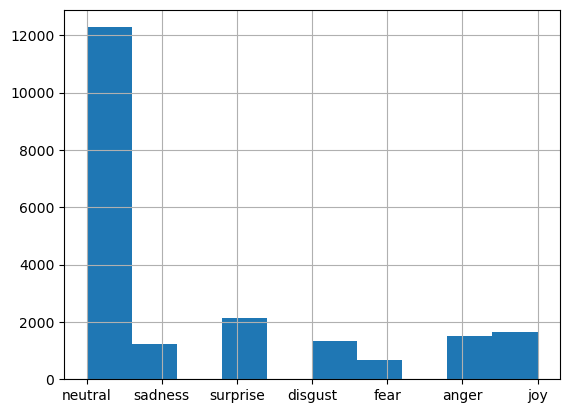

In [6]:
results_df['label'].hist()

In [7]:
# Extract only anger, disgust
negative_df = results_df[results_df['label'].isin(['anger', 'disgust'])]
negative_df


,label,score,text,words
8,disgust,0.923857,Where would I report to if I found a room (not...,"[Where, would, I, report, to, if, I, found, a,..."
10,disgust,0.472802,Porter Dining hall hate post,"[Porter, Dining, hall, hate, post]"
15,disgust,0.459489,is it a bad idea to only take 12 credits my se...,"[is, it, a, bad, idea, to, only, take, 12, cre..."
44,disgust,0.339844,‎,[‎]
50,anger,0.759817,Econ 100a discord,"[Econ, 100a, discord]"
...,...,...,...,...
20733,disgust,0.657981,"16 is not horrible, but 13s is soo time consum...","[16, is, not, horrible,, but, 13s, is, soo, ti..."
20742,disgust,0.657981,"16 is not horrible, but 13s is soo time consum...","[16, is, not, horrible,, but, 13s, is, soo, ti..."
20776,anger,0.338851,Your boss did? Was he throwing it away?,"[Your, boss, did?, Was, he, throwing, it, away?]"
20780,anger,0.812016,Don't drop it,"[Don't, drop, it]"


In [8]:
#Word Frequency Analysis:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
word_count = vectorizer.fit_transform(negative_df['text'])
sum_words = word_count.sum(axis=0)
word_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
word_freq[:10]  # Display top 10 frequent words


[('people', 555),
 ('just', 497),
 ('don', 471),
 ('like', 440),
 ('israel', 406),
 ('said', 206),
 ('time', 200),
 ('ve', 198),
 ('saying', 196),
 ('think', 196)]

In [9]:
#N-gram Analysis (2):

bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigram_count = bigram_vectorizer.fit_transform(negative_df['text'])
sum_bigrams = bigram_count.sum(axis=0)
bigram_freq = [(bigram, sum_bigrams[0, idx]) for bigram, idx in bigram_vectorizer.vocabulary_.items()]
bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)
bigram_freq[:10]  # Display top 10 frequent bi-grams


[('jewish people', 53),
 ('war crimes', 50),
 ('don want', 48),
 ('bus driver', 39),
 ('don think', 36),
 ('west bank', 36),
 ('israel right', 32),
 ('bear responsibility', 32),
 ('responsibility actions', 32),
 ('santa cruz', 31)]

In [10]:
#N-gram Analysis (3):

bigram_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
bigram_count = bigram_vectorizer.fit_transform(negative_df['text'])
sum_bigrams = bigram_count.sum(axis=0)
bigram_freq = [(bigram, sum_bigrams[0, idx]) for bigram, idx in bigram_vectorizer.vocabulary_.items()]
bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)
bigram_freq[:10]  # Display top 10 frequent bi-grams


[('bear responsibility actions', 32),
 ('commit war crimes', 27),
 ('bus driver shortage', 26),
 ('middle eastern state', 24),
 ('israel right exist', 19),
 ('ran dormitory shouting', 18),
 ('whore running naked', 18),
 ('areas west bank', 16),
 ('critiqued term transgender', 16),
 ('term transgender genocide', 16)]

In [11]:
#Topic Modeling:
#Identify common themes or topics within the negative sentiments to understand the specific issues that cause anger or disgust.


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text
count_vect = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
dtm = count_vect.fit_transform(negative_df['text'])

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display the top words for each topic
for i, topic in enumerate(lda.components_):
    print(f"Top words for topic #{i}:")
    print([count_vect.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
    print("\n")


Top words for topic #0:
['way', 'anti', 'just', 'actions', 'palestine', 'crimes', 'like', 'war', 'people', 'israel']


Top words for topic #1:
['read', 'didn', 'school', 'think', 'jews', 'just', 'said', 'israel', 'people', 'don']


Top words for topic #2:
['know', 'saying', 'make', 'doesn', 'naked', 'like', 'campus', 'people', 'don', 'just']


Top words for topic #3:
['israel', 'class', 'sure', 'good', 'people', 'don', 'say', 'just', 'bad', 'like']


Top words for topic #4:
['israel', 'yes', 'want', 'students', 'money', 'right', 'genocide', 'people', 'just', 'like']


